# Exploratory Data Analysis (EDA) for Brent Oil Price Change Point Analysis

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import seaborn as sns

# Set plot style
plt.style.use('seaborn-v0_8')
%matplotlib inline

# Load price data
prices = pd.read_csv('../data/BrentOilPrices.csv')
prices['Date'] = pd.to_datetime(prices['Date'], format='mixed')
prices.set_index('Date', inplace=True)

# Check for missing values and basic stats
print('Price Data Info:')
print(prices.info())
print('\nMissing Values:')
print(prices.isnull().sum())
print('\nBasic Statistics:')
print(prices.describe())
display(prices.head(), prices.columns)

Price Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9011 entries, 1987-05-20 to 2022-11-14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   9011 non-null   float64
dtypes: float64(1)
memory usage: 140.8 KB
None

Missing Values:
Price    0
dtype: int64

Basic Statistics:
             Price
count  9011.000000
mean     48.420782
std      32.860110
min       9.100000
25%      19.050000
50%      38.570000
75%      70.090000
max     143.950000


,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


Index(['Price'], dtype='object')

## 1. Trend Analysis

Plot the raw price series to identify long-term trends and potential structural breaks.


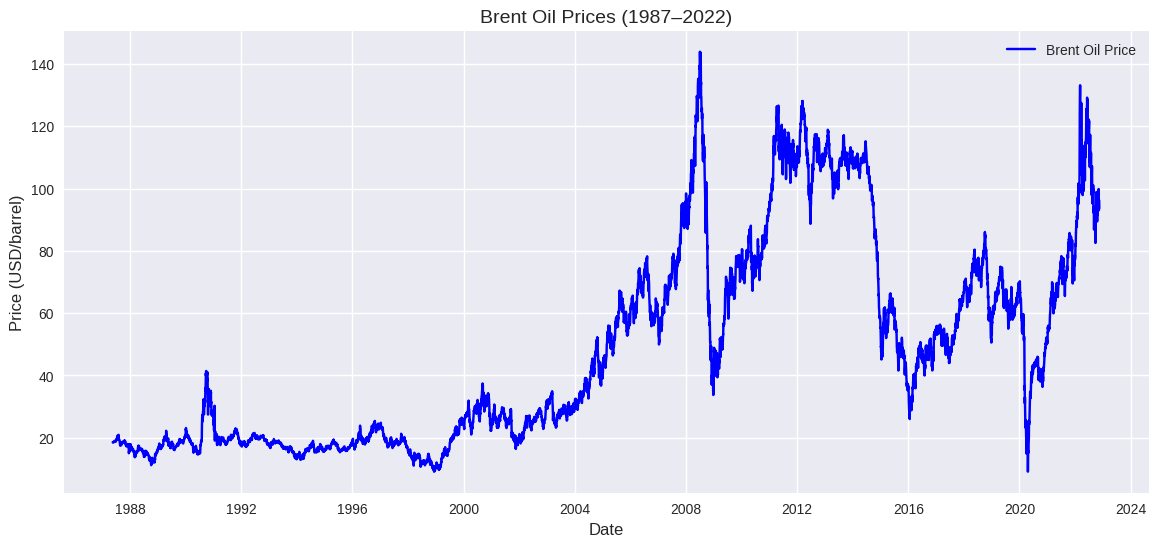

In [20]:
# Plot price series
plt.figure(figsize=(14, 6))
plt.plot(prices['Price'], label='Brent Oil Price', color='blue')
plt.title('Brent Oil Prices (1987–2022)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD/barrel)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

## 2. Stationarity Test

Test for stationarity using the Augmented Dickey-Fuller (ADF) test. Non-stationary data will be transformed into log returns.


In [21]:
# ADF test on raw prices
result_price = adfuller(prices['Price'].dropna())
print('ADF Test (Raw Prices):')
print(f'ADF Statistic: {result_price[0]:.4f}')
print(f'p-value: {result_price[1]:.4f}')
print('Critical Values:', result_price[4])

# Compute log returns
prices['Log_Returns'] = np.log(prices['Price']).diff()

# ADF test on log returns
result_log_returns = adfuller(prices['Log_Returns'].dropna())
print('\nADF Test (Log Returns):')
print(f'ADF Statistic: {result_log_returns[0]:.4f}')
print(f'p-value: {result_log_returns[1]:.4f}')
print('Critical Values:', result_log_returns[4])

ADF Test (Raw Prices):
ADF Statistic: -1.9939
p-value: 0.2893
Critical Values: {'1%': np.float64(-3.4310783342658615), '5%': np.float64(-2.861861876398633), '10%': np.float64(-2.566941329781918)}

ADF Test (Log Returns):
ADF Statistic: -16.4271
p-value: 0.0000
Critical Values: {'1%': np.float64(-3.4310783342658615), '5%': np.float64(-2.861861876398633), '10%': np.float64(-2.566941329781918)}

ADF Test (Log Returns):
ADF Statistic: -16.4271
p-value: 0.0000
Critical Values: {'1%': np.float64(-3.4310783342658615), '5%': np.float64(-2.861861876398633), '10%': np.float64(-2.566941329781918)}


## 3. Volatility Analysis

Plot log returns to observe volatility clustering (periods of high volatility followed by more high volatility).


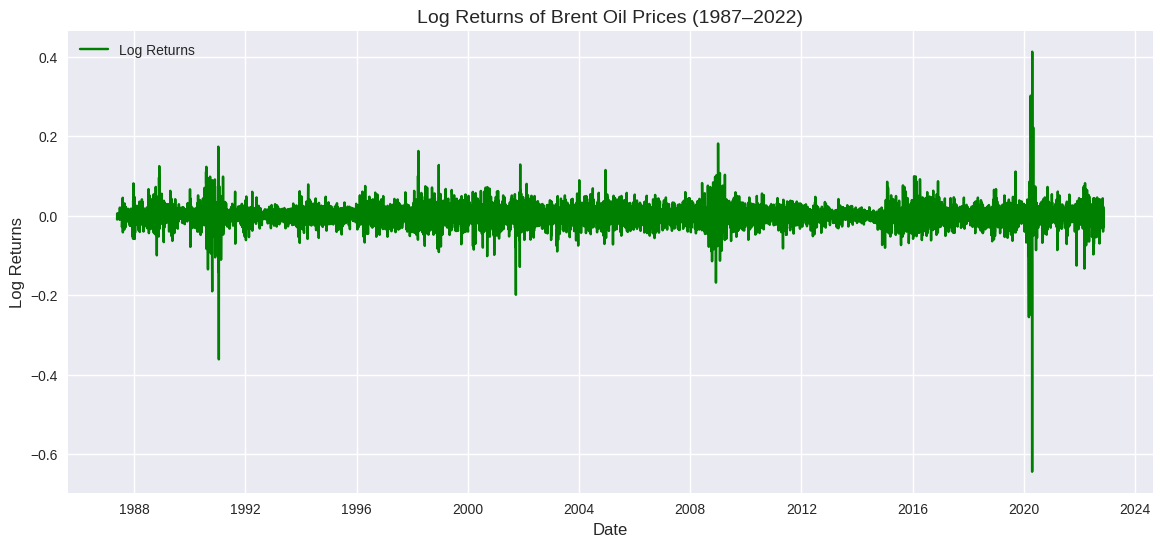

In [22]:
# Plot log returns
plt.figure(figsize=(14, 6))
plt.plot(prices['Log_Returns'], label='Log Returns', color='green')
plt.title('Log Returns of Brent Oil Prices (1987–2022)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Log Returns', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

## 4. Seasonality Check

Analyze the price series for seasonal patterns using a rolling mean or autocorrelation.


<Figure size 1400x600 with 0 Axes>

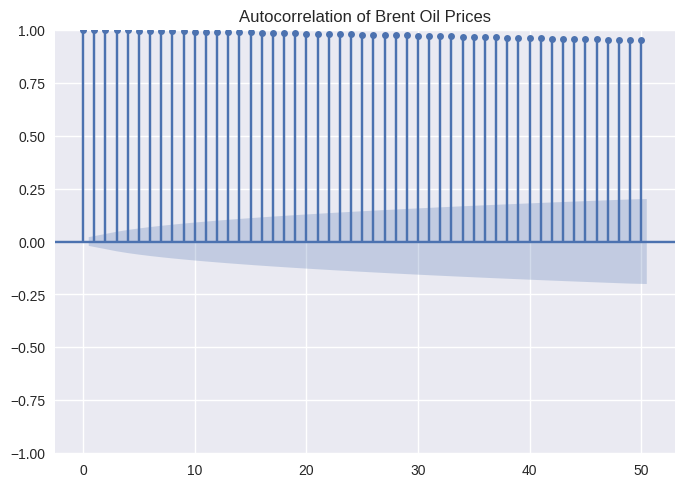

<Figure size 1400x600 with 0 Axes>

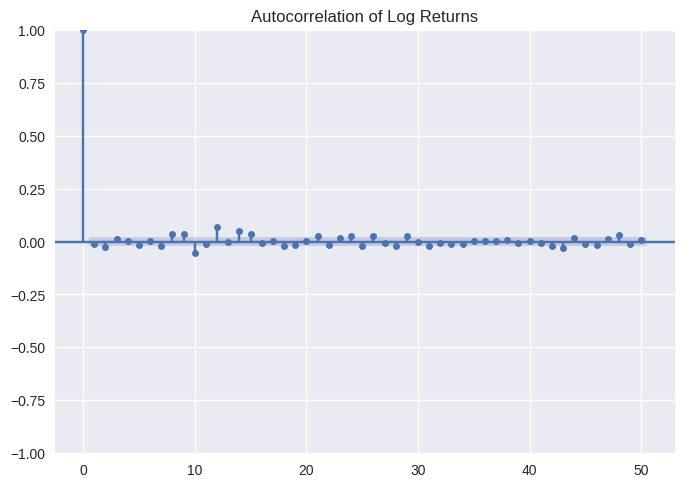

In [23]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot autocorrelation of prices
plt.figure(figsize=(14, 6))
plot_acf(prices['Price'].dropna(), lags=50,
         title='Autocorrelation of Brent Oil Prices')
plt.show()

# Plot autocorrelation of log returns
plt.figure(figsize=(14, 6))
plot_acf(prices['Log_Returns'].dropna(), lags=50,
         title='Autocorrelation of Log Returns')
plt.show()